In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats

In [100]:
N = 1600
M = 1200
alpha = -3
beta = 0.6
sigma = 1

In [101]:
eps = np.random.normal(0, sigma, (M, N+1))

eps_mtx_visual = pd.DataFrame(eps)
eps_mtx_visual


,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,1.770868,0.428558,-0.249258,-0.206323,-0.696370,-1.798135,0.697619,-0.468386,1.270933,-1.201291,...,-1.281406,0.644854,0.437833,0.438330,1.945500,-1.470646,0.025191,1.325243,-1.815665,-0.210252
1,-1.706407,-0.381164,0.060071,0.421899,-0.188507,0.053244,0.977608,-0.831702,0.584727,-1.447442,...,-0.597028,0.472023,0.802494,-0.640864,-1.145456,0.110394,-0.899982,1.545887,-0.133986,1.388075
2,-1.564168,-0.631100,0.457673,-2.105506,-2.117769,1.491667,-1.135086,-0.584013,0.370306,-0.780671,...,0.340207,0.360599,1.148098,1.049416,-2.202458,0.191536,0.301912,0.010537,-0.347553,1.300400
3,0.388288,1.049292,-0.512801,1.436887,-1.769638,-0.959212,-0.810132,0.785798,1.143644,0.202683,...,2.329398,0.938113,-0.585353,-0.838416,-0.258307,2.986574,-0.227804,-0.111173,0.970594,0.820593
4,0.388848,0.932678,-0.884339,0.271005,-0.185839,0.088321,-1.726121,0.724602,0.568074,-0.516825,...,-0.710642,1.465772,0.887646,-0.099783,0.558505,-0.925877,1.458762,0.319463,1.028307,-0.649569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.702369,0.064163,0.346347,0.177885,0.197948,-1.435541,0.789938,-0.609647,0.242825,0.812930,...,0.992496,-0.058804,1.114523,-0.345711,0.909317,-0.890382,1.443434,-0.273340,0.790439,0.128633
1196,0.177081,0.080938,0.075989,-0.928437,-0.358021,0.324509,-0.101774,-0.902828,-1.025202,-1.510669,...,-0.129417,2.692438,0.207308,1.435700,-0.215662,-1.885730,-0.652595,-0.295078,-1.117848,-0.845663
1197,-0.916202,-1.186072,-0.802883,1.027018,-0.787412,-0.452612,1.910067,1.026481,1.673381,-1.545716,...,-0.937267,-0.075790,-0.306059,-0.961857,-2.013641,-2.007386,0.294798,0.684005,-0.783932,-0.517551
1198,-2.445861,-0.152588,-0.497853,0.961193,-1.006358,0.405587,-0.718493,-2.736675,0.220855,0.070616,...,-0.072706,-0.414567,-0.349415,0.476816,-1.043117,0.570560,-1.405522,-1.360555,0.508711,-0.022441


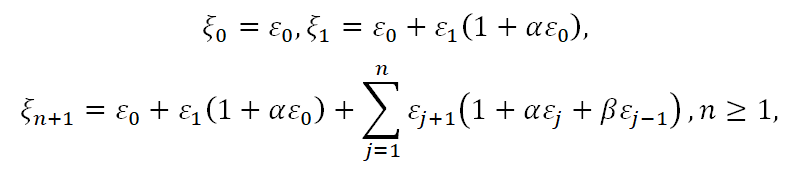

In [102]:
ksi = np.zeros((M, N+1))

for i in range(M):
  ksi[i][0] = eps[i][0]
  ksi[i][1] = eps[i][0] + eps[i][1] * (1 + alpha * eps[i][0])

for i in range(2, M):
  for j in range(N+1):
    # for k in range(0, j):
    #   sum = eps[i][k] * (1 + alpha * eps[i][k-1] + beta * eps[i][k-2])
    ksi[i][j] = ksi[i][j-1] + eps[i][j] * (1 + alpha * eps[i][j-1] + beta * eps[i][j-2])

ksi_mtx_visual = pd.DataFrame(ksi)
ksi_mtx_visual

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,1.770868,-0.077332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-1.706407,-4.038835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.864143,0.779195,1.673853,3.256517,-12.819725,-3.735472,1.651261,-1.444159,-0.677260,-0.317117,...,-83.798780,-83.673693,-83.533249,-85.871281,-82.657035,-81.079349,-81.349887,-81.347683,-81.747208,-79.082711
3,-0.341469,0.002167,0.984132,5.536158,11.939311,5.060756,2.779542,5.022892,2.914615,2.517466,...,34.669809,29.795343,30.039259,27.256617,26.439326,30.237860,32.086424,31.700058,32.861701,31.238168
4,1.386513,0.867677,2.251426,3.393066,3.456923,3.608845,2.532549,7.047805,5.792656,5.931920,...,-276.481001,-272.232111,-275.626204,-275.548027,-274.524881,-273.844005,-267.844505,-269.100574,-268.157752,-266.927959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.764434,-0.560121,-0.426400,-0.426496,-0.293049,-1.029320,3.256403,4.616611,5.418637,5.342009,...,-34.167659,-34.092727,-32.117895,-31.295499,-28.835024,-27.111797,-21.025212,-19.968880,-17.845697,-18.043190
1196,0.507563,0.504435,0.570047,-0.191824,-1.563369,-1.071089,-1.051921,-2.406188,-6.145531,-11.484094,...,222.439393,225.115058,223.631774,226.493896,227.180286,222.450111,218.190110,217.651195,215.981491,212.449583
1197,-1.907802,-5.985608,-9.203963,-6.434088,-4.416120,-6.216814,-2.615593,-7.749814,-9.311751,-4.049742,...,93.594809,93.299716,93.096183,91.294910,83.840541,70.865180,72.579128,71.834366,72.520413,70.573281
1198,-3.357067,-4.627231,-4.622377,-2.313587,-0.117421,1.746573,2.336152,-6.965346,-5.026473,-5.118597,...,110.743795,109.972346,109.203607,110.061639,110.729336,113.248608,115.128562,107.565370,109.721467,109.751594


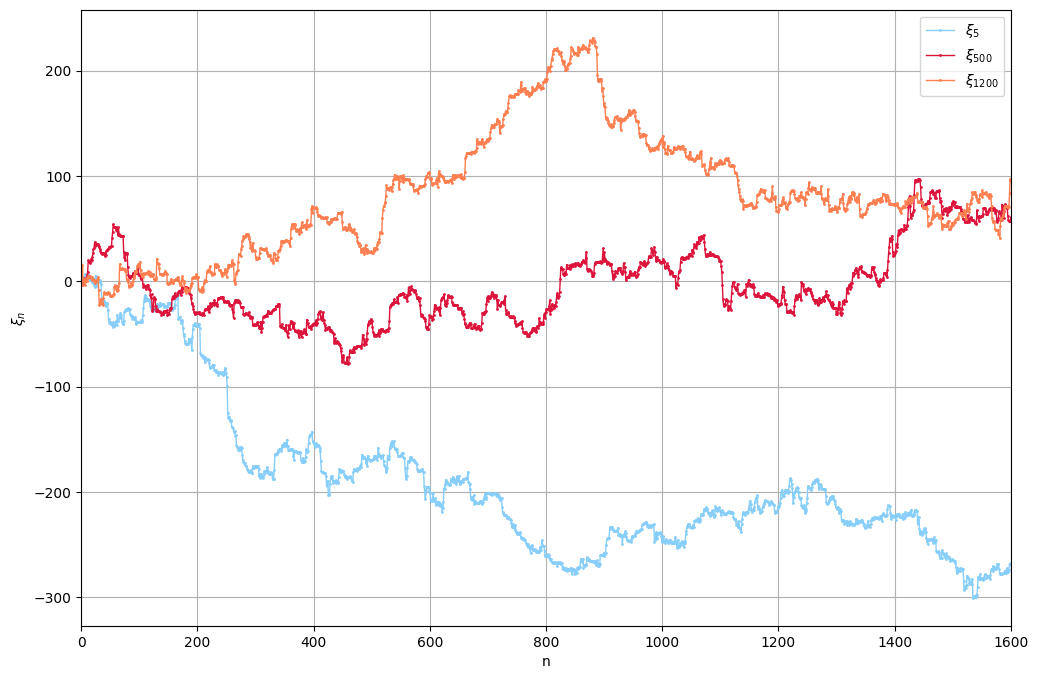

In [103]:
plt.figure(figsize=(12, 8))
n = np.linspace(0, N+1, N+1)
plt.xlim([0, N+1])
plt.plot(n, ksi[4], '-o', markersize = 1, linewidth=1, color='lightskyblue', label="$\u03BE_5$")
plt.plot(n, ksi[499], '-o', markersize = 1, linewidth=1, color='crimson', label="$\u03BE_{500}$")
plt.plot(n, ksi[1199], '-o', markersize = 1, linewidth=1, color='coral', label="$\u03BE_{1200}$")
plt.xlabel('n')
plt.ylabel('$\u03BE_n$')
plt.grid()
plt.legend()
plt.show()

![image.png](_2riLS0fik1m9qSe6uqNHz3SU8g3ti+0Tz4o7jkGoQwVfiBxgfgoDtT3Ez+hUdP7+5mahADDImvBzome3jf03bPuaKYCZYksPw3JfKo7u1OVk56fD72WnzIEVACAL0Y1KZnYTUS+Mb4Tn28Div7YbVBl+WlwS2P9tzRbkSxKjWMKbq1Pru4TA+pRdnqcN7y9oel0QRVlz5yqtLbmEa8Xe+sRQHUNOGPSvW1ww2H+zbR2p2xIbFTEmi6qeuWosQ3cDsr4PJ1UhZg9LRyfcePk0nZU1OoqfbduTyI10lOpXzltuhbpV3q/UHPWkyb2xOloNszOJ7vxdnEbxDSdivQtbEXL/VA5n3f9mqfBYlG1fjn5iM/cF65trXIm7Tn/eiuAiLReiOXl3xfLXl+YX6zfy6fq/aJqahffP5tnhp4HCvvaRwVT7t72ZwRTTqeHt1vaFduSive5naqsuGQl3oh+34uISgHdd/28VyxT7m8+z+u3LLIktY6solGDSklZpY8CXXBM4S77PNnp98SUFTCbssLmdJ68Iom5nES8Z83vWpdkdwrFdoRcmK2XyRWowki8l83LFbH0Z67taLQNyUlcMXl/i9dZrYNIW+vDXT6fN92N3xZTaP+AX830NHEFAd5ek3PdRfrm2+tZb1nZwKgwULH/rQpx1ke8H8vLVu9xWuj3Mm33Q9V8hQp7xno0ToMzy1GfGd83l9GoMlW+HDOtzfxb+rl0XdMNrLHs2vmlcrt98wit8kzLZVXO12UeOIPTVPxeo93tkp6/Wk7F9P4x5P4SaeDZn58QUHXGdH1m7GQ7w+iTZDEXOb6/Cwu/61sX8b7KE+YJuLhG7hNPm21Ig7MrI1YFbj5QA+c6aLx9gfiOXGaNfSPVT08Lf174IDsBldbdCHb6HRPPZ29P+n3HycWzD7Nl+9bJsRHt94N/Pt/6iQ8apoF/Oen75U3K869z3Tx8y3Gmnc4XVct2JLWar/BB9vuFtKpK3/Qzf/rWzzOs3bKq5/Mvr3ke8EqPT8e6NWYc622m2uv8w/T+yPe4fpBdRAX3v8uFxbqGFjMb5x7Xz7TlNlarwgMO8f0/IrKJX1N/C7ON/Yzda7Yp1IoL6HZcnHNEj3qFZK0x+ardNvgc1wt6k82R/e6fIrmF5jqk9m8HCu/v9V/1NEnP9rgdGf+/pWfrORc70t9XsV0XPo4Z/VI1z7soJ6mzH5rrKA2Oa3re8gu78oWi294JrvzRhf3LkmLnssd0q7PKttQ9TTeus1/cBp0HxHfXD7wfyuWIrYhjnWvPihjQaqo7lJr5SPurT3X0HFA5A6lGyVk15wJVQ0swGueqeSbkmmX0+C52MNfQ1G90bXyrw8uB/lnr02QbPMSJ8oVWtLnTf/uMf5MsEhAHpX3e4irjE7r7rf+spb/0nK30hUBx6KXjX3qlDqqzi4si6+DW5amyXIUd/tnL9am7H1roIg1kxQt+Uax8oY1+3+s86uh2rTYut1/Qg0w782JLNY7n356XTjJp/6lC3bRu4or7pWTgeUBc1ai0RlPEQes5oHKfi/qlTxbAUjXmuSY9Hl+uzTa4iCvOF6JVrSu9/E7Zuuvdv9EhWjWsmNBjeo70hUC8pBfjRM8BQlyWe66yY3o1rkJkJTF1e+aVVSQbP9PH3R/a6Tu2eprsB96UcSGoiGlesX6t0sBeTnaB4GPk0YO66qstX85YLEdsRxAVKn/o/CLeTwp3KdZUGAHkck32S/M8YxtmHjDJLvQE51OxAXPmlS861fFptXybHvj5HeJwNN+G3H4hj+D6B4euCp4flOIk8Hyo+bjIpY/0NC4Eslsn7uJvQk+lkxc/uuTOFowT1nRKL/9+0Sp9hl6ialmP50s63O/ECV+1JW3yALjpfgiipHyw7Xzrx5qkQc5cTtLgAsH31MTHWs4ukvlrPta1W03xhwit/am3X9rkmbKh5oFc+pSg+f6FfvUcUPMyl/hsh6npI8l0Hvsq1CaCS2Xzli4U16fJNhTsF/R2VyzDPSetCq4PytaPTXtOz/RCYPusmgyIu+qt7HezbMSdLZgnKe5s4XHmPdHtF2Oab2N5gnuv+J5Xq/3QQoM0cEnLis8WIYjQcklxMjeef0/S8voH3cQjzS9Vj5NFfll3ePw12C9N80zJF8kDqUsu4i1Hd3OfulPpggukngNqHhREVHBXoODuovj/LLONKDufZAd5AQeX2ys9CuGMz/8b69N8G0x/afF216qMcvT4pKpMiINy+vBKk6c2j9n6Ts80vWJailtrfnTVTWfVqssxDiLt7tLb74fmLkyDmRpFg+d3XsPJ3mKELsrXssfH6QVXnl+2c0/bO5FfPj666pGmz/3yVfKAccwWy2FhUHp/5JsFBRGmyrXe+NzApwa7BmpaqC8z48NCBAFjPq6IIoLLpTVG8xOITZVd2OvTZhtS8fKD7lofwWmNzpjieOKodVlP6/QUFwptboHyC4G5uKN01Ra9RLvRYS7bD81dlgZ5TV5nUNMXcGGrC6yCNDgL6ePFPL9saV7s+IE7exD5xblBLfJLn/vlK+WBbB/E50dfqaWnWr5N1O6U5xOm2kTi1GA2XOY2Z1VtkJJTlLbl8jVYNtpA5R0LiLdlW67A2aZNfZb+rj0FFW2isnZl3A7M+bW8LZ1adrY2+Qgkrt9vtA12I3j71zht0+UX11Gsm5jPSu90ucYCkihNG3P9q9VNT7Vuaj9yHrCTwtzXvvRVsm107dxK/vTJ3g8i/b7Kp2m7XX4/4XXM9k/7/ZDNV2oDWDWf7Xwa5O2eXcsxP8uWo/NDs1Fy8u2x8jZ3iuFZfmV+MZattrFpfmm7X3xq7stB5oEK5v6R61E3Pb4Czt+eeDEgfBzI82+7jh2Mg9gx2YGm+rul/MO9iBhBmqcgNE4ULuLkUcxQWc8tRUbAs6fiTksDqnh/V86w3t9ndbbBcyKS6eFZR07XrAF8OhkHMZ+oVHp60rx0wHvUSM98PcQyjYTLTyD25Lz4YHJbmx0wpTQoLYNP0Pl3srQ30pVP9vLbLfdD6/lcqtKgajkZceIWF0/mMoNzebTIs5x04mHAQuMC0VI6oZcv4BrnF/Ebrvdbpa9QmWeGngdqkid1Yz/YeeSL4nSpe976RBcG1J/ACKhD35tf2Rc5YK4KaQAd5oHsqeF3iKh80eLZDnkD0erkzOf2fs/rn9ZsBn6WJm3uviukAXSZB2artEOPr89fSUtVPrx11OlIy1ztGsfma+6lqqo1Q/cQUKEHTbpY+66QBtBtHuDgLLsidFR+/Fo4aLoracluUj2110ePf0jcvZLd0cbYCrDca921uuR0QUCFKzvSnvs+njxdv63fYCENoMs8oDs0kUO4FYY0+4q4ZrmzW03VTaq/d6gRjVdPFAYBBWFI0S6hJCnUQJbtf92tMa5CP/r9ucwhq1CI2olyxRB3Af53hjSAa+UBLlPMKtt9A5xOzkpcsjKYP81UGfL5MlK5H3qqu/CDA2paGak44cR3qawmnJi45u1PvExBGgDyQD0cGMtBUbdg8FW4krWlK2pTm/R3+6i7dcP/iB0OAADQsz0tbt7o7rSxe5XjrhHHS5rsTp6erHi+OW150IazAzMcaT0d05LqfPcyKEMFAIDP4enT2D8Gb2pGmyShaLKkcVohaerrT1p3+3i2L+zLIaACAMCn4G5ay81l9Og6FYMHyCH6HsRd50FXRuLiy4q7TzVmcLkJzX6R1g4uNL+xBg/w9GHtgIAKAACfQDUjKnf3rAcD8Aw+wu1PechGekpEEN3Q42x09jFu2sSo2GRpthF3ueLmlVnNa7iv4x33vBxQlBQeR1dAQAUAgOvhARSmU1oUo2PFEJRqMADXkIE8jmws4lxEKxFI61HNb9yjMfEA+iJoRhw8HctrOIITAioAAFwF301OX/6JVzFtnwtlnDxK0sQz7N/oN3GxZz4g+wU4cIt46hyNSY6uNKFfj2qIRHMd5UhjvvXzkXV9AQAArkW2KbWbrvCACZVNWTztUFX7U3IO5uFS1Q5VfqZXQrUbTpvwqGY7TZva4A4VAACuS/ZYZN4BcsWjM2PCeno5mm3eKRHROIi3tJyP6YbHh7W/YqjubSn5EJ/pQlyr4pK8qw0aD/+MgAoAAFdWaLoiy09d3Q2a1Dzx61/7UbEwmm3kAOnJLlKB9cHTZGb/Qss4pCdn/4yq4/10IH2uiPQU6spJ/Di6YfkpQ0AFAICrGz0+USjuAJcve1nrts6oO3Keivajo5kKgj5cDhpEK3ctXVl+at8lc2f6XDnp+fnQvPxUQEAFAIAezGilnvvSQ+1Rd3gINqIPT0Q97hc03wYU/XG1Qd3Tv0O5qUxKNqUpdsqvH03Hcf4ouAl0PQgAAD3RXQaKO8NdsbvBpkQwnb7d0tPqkWq3oEmJeW/mW/U63NHJ6N9QtnNtOZIPAioAAPRGBqyPJyuIfRcIqAAAAB1AGSoAAEAHEFABAAA6gIAKAADQAQRUAACADiCgAgAAdAABFQAAoAMIqAAAAB1AQAUAAOgAAioAAEAHEFABAAA6gIAKAADQAQRUAACADiCgAgAAdAABFQAAoAMIqAAAABcj+h/ogt44QetS6QAAAABJRU5ErkJggg==)

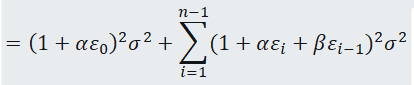

In [104]:
ksi_sq = np.zeros((M, N))

for i in range(M):
  ksi_sq[i][0] = (1 + alpha * eps[i][0])**2 * (sigma**2)

for i in range(M):
  for j in range(1, N):
    ksi_sq[i][j] = ksi_sq[i][j-1] + (sigma**2) * (1 + alpha * eps[i][j] + beta * eps[i][j-1])**2

zeta = np.zeros((M, N))

for i in range(M):
  for j in range(N):
    zeta[i][j] = ksi[i][j] / ((ksi_sq[i][j])**(1/2))

zeta_visual = pd.DataFrame(zeta)
zeta_visual

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.410626,-0.017648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.278860,-0.649246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.854482,0.129460,0.275961,0.335143,-1.117916,-0.300988,0.122360,-0.105775,-0.049577,-0.022462,...,-0.650848,-0.654676,-0.653699,-0.652503,-0.670722,-0.644284,-0.631971,-0.634079,-0.634037,-0.637069
3,-2.071234,0.001128,0.265593,1.068953,1.349731,0.545160,0.286192,0.508104,0.289209,0.248384,...,0.326173,0.271723,0.233518,0.235350,0.213483,0.207072,0.236345,0.250701,0.247672,0.256717
4,8.325184,0.551409,0.500659,0.752338,0.716175,0.741488,0.320299,0.858470,0.705205,0.681192,...,-2.156903,-2.172142,-2.137797,-2.164409,-2.163572,-2.155502,-2.149036,-2.100954,-2.110752,-2.103125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.246028,-0.178895,-0.136186,-0.133165,-0.090348,-0.162840,0.485795,0.617788,0.725057,0.704338,...,-0.253340,-0.268044,-0.267430,-0.251896,-0.245390,-0.226072,-0.212445,-0.164676,-0.156368,-0.139732
1196,1.082783,0.513434,0.445318,-0.047492,-0.362344,-0.248012,-0.230089,-0.411420,-0.899355,-1.364168,...,1.703027,1.699339,1.717217,1.705705,1.727026,1.731943,1.693786,1.661189,1.656979,1.643437
1197,-0.508937,-1.090637,-1.505131,-0.970397,-0.571120,-0.781112,-0.278251,-0.820403,-0.927370,-0.336397,...,0.727025,0.713945,0.711685,0.710060,0.696044,0.638436,0.539102,0.552122,0.546444,0.551437
1198,-0.402643,-0.554984,-0.532735,-0.258590,-0.011674,0.173071,0.219385,-0.504704,-0.362598,-0.368432,...,0.855934,0.857033,0.850939,0.844909,0.851537,0.856204,0.875637,0.889351,0.830482,0.847083


In [105]:
s_N = [0 for i in range(M)]

for i in range(M):
  s_N[i] = zeta[i][N-1]

l = math.floor(1 + 3.32 * math.log10(M))
l

11

In [106]:
max = np.max(s_N)
min = np.min(s_N)
omega = max - min
h = omega / l
count, interv = np.histogram(s_N, l) #количество попаданий и интервалы группировки
p = count / M #относительные частоты
col = p / h #высоты столбцов

mid = np.zeros(len(interv) - 1)
for i in range(len(interv) - 1):
  mid[i] = (interv[i+1] + interv[i]) / 2
(count, interv, col, mid)

(array([ 15,  46, 115, 222, 256, 241, 177,  93,  31,   3,   1]),
 array([-2.79251354, -2.21039572, -1.62827789, -1.04616007, -0.46404224,
         0.11807559,  0.70019341,  1.28231124,  1.86442906,  2.44654689,
         3.02866471,  3.61078254]),
 array([0.02147332, 0.0658515 , 0.16462876, 0.31780508, 0.36647793,
        0.34500461, 0.25338513, 0.13313456, 0.04437819, 0.00429466,
        0.00143155]),
 array([-2.50145463, -1.9193368 , -1.33721898, -0.75510115, -0.17298333,
         0.4091345 ,  0.99125232,  1.57337015,  2.15548797,  2.7376058 ,
         3.31972362]))

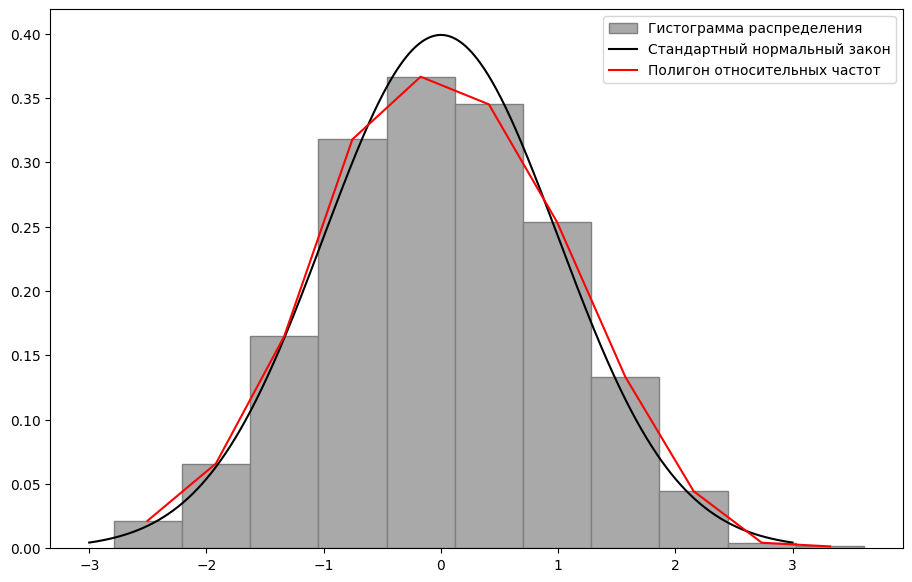

In [107]:
plt.figure(figsize=(11, 7))
plt.hist(s_N, bins=l, density=True, edgecolor='grey', color='darkgrey',  label="Гистограмма распределения")
x = np.arange(-3, 3, 0.001)
plt.plot(x, scipy.stats.norm.pdf(x, 0, 1), color='black',  label="Стандартный нормальный закон")
plt.plot(mid, col, color='red',  label="Полигон относительных частот")
plt.legend()

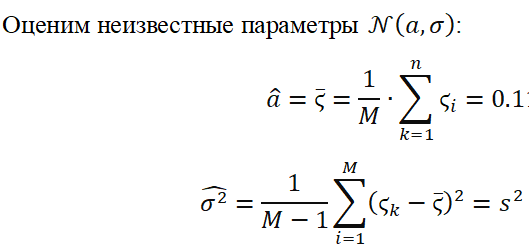

In [108]:
sum1 = 0
sum2 = 0
for i in range(M):
  sum1 += s_N[i]
a_m = (1 / M) * sum1

for i in range(M):
  sum2 += (s_N[i] - a_m)**2
s_2 = (1 / (M - 1)) * sum2

(a_m, s_2)

(0.007084108886351675, 0.9928850106075471)

In [109]:
p_1 = scipy.stats.norm.cdf(interv[1], a_m, s_2**(1/2)) - 0 #F(-inf) = 0
p_2 = scipy.stats.norm.cdf(interv[2], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[1], a_m, s_2**(1/2))
p_3 = scipy.stats.norm.cdf(interv[3], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[2], a_m, s_2**(1/2))
p_4 = scipy.stats.norm.cdf(interv[4], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[3], a_m, s_2**(1/2))
p_5 = scipy.stats.norm.cdf(interv[5], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[4], a_m, s_2**(1/2))
p_6 = scipy.stats.norm.cdf(interv[6], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[5], a_m, s_2**(1/2))
# p_7 = 1 - scipy.stats.norm.cdf(interv[7]) #F(+inf) = 1
p_7 = scipy.stats.norm.cdf(interv[7], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[6], a_m, s_2**(1/2))
p_8 = scipy.stats.norm.cdf(interv[8], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[7], a_m, s_2**(1/2))
p_9 = scipy.stats.norm.cdf(interv[9], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[8], a_m, s_2**(1/2))
p_10 = scipy.stats.norm.cdf(interv[10], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[9], a_m, s_2**(1/2))
p_11 = 1 - scipy.stats.norm.cdf(interv[10], a_m, s_2**(1/2))
p_i = [p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11]
(p_i,
 M * p_1, M * p_2, M * p_3, M * p_4, M * p_5, M * p_6, M * p_7, M * p_8, M * p_9, M * p_10, M * p_11,
 count)

([0.013026835101740167,
  0.037349974237207526,
  0.09487642901818524,
  0.1729206405277705,
  0.22617196092845948,
  0.21231080334295227,
  0.14303352069203157,
  0.06914813555611898,
  0.023982859507168608,
  0.005965703750713702,
  0.0012131373376519372],
 15.6322021220882,
 44.81996908464903,
 113.8517148218223,
 207.5047686333246,
 271.4063531141514,
 254.7729640115427,
 171.6402248304379,
 82.97776266734277,
 28.779431408602328,
 7.158844500856443,
 1.4557648051823247,
 array([ 15,  46, 115, 222, 256, 241, 177,  93,  31,   3,   1]))

In [110]:
chi_B = 0
for i in range(l):
  chi_B += (count[i] - M * p_i[i])**2 / (M * p_i[i])

chi = scipy.stats.chi2.ppf(0.95, l-1-2) #Квантиль хи-квадрат
(chi_B, chi)

(6.8078148776584575, 15.50731305586545)

# **Проверим, зависит ли этот закон от закона распределения последовательности {ε_n}**

In [121]:
eps = np.random.uniform(-3**(1/2)*sigma, 3**(1/2)*sigma, (M, N+1))
eps_mtx_visual = pd.DataFrame(eps)
eps_mtx_visual


,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,1.287598,-0.729829,-0.293013,-0.036114,1.387955,-0.044921,1.305885,1.227519,-1.078814,-0.002189,...,-1.420740,-1.122721,0.882783,0.503381,-0.939913,-0.440717,0.304132,0.333020,-0.445326,-1.487584
1,1.010058,-1.298234,1.409475,1.594772,-1.364798,1.412609,0.068508,1.284759,1.213024,-1.481496,...,0.291555,-1.150186,-1.467411,0.184051,1.055055,0.264488,-0.554250,0.909840,0.748859,0.697833
2,1.675042,0.279828,0.222752,-0.997253,-0.326022,-0.218771,0.616200,0.556729,-0.932086,0.077099,...,-0.704374,-1.481796,0.918012,-0.059000,-0.352304,1.538187,1.143057,0.225691,1.093928,1.473095
3,0.747477,-1.578295,-0.912961,0.031083,0.875400,0.687613,0.838580,1.598868,0.700406,0.238414,...,-0.565028,-1.255380,1.430428,-0.911506,0.139556,-1.650086,-1.435580,-1.042523,1.172578,-1.022882
4,-1.094213,-0.736576,0.391284,0.458714,-1.054143,-0.152792,0.132480,0.859503,1.148683,-0.479724,...,1.406829,0.424426,-0.148073,0.128971,-1.024733,0.823299,-1.019592,-0.605037,1.315125,-0.019186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.572083,0.968750,0.484358,1.486313,0.358099,-1.468464,0.164079,-0.201965,1.321211,-0.783593,...,-0.796631,-0.410713,-1.281987,-1.731859,-0.470002,-0.835318,0.252925,1.713902,-0.976798,-0.051071
1196,1.535862,-0.159645,0.177543,-0.259763,1.643539,1.206058,1.361757,0.995383,1.477732,-1.430370,...,-0.298346,-1.174859,-1.382358,-0.021604,-0.884095,-0.319465,1.012988,-1.479724,0.904848,-1.457084
1197,-0.879195,-1.349990,-1.049405,-1.594936,-1.230271,1.176198,-0.644959,-0.815582,-1.317207,-0.687500,...,-1.593809,1.610399,0.298782,-1.441980,-1.534794,0.727001,-1.707340,-0.985273,0.275479,1.254106
1198,0.918223,-0.666429,1.167805,-0.655183,-0.172106,-1.575573,-0.496379,-1.102280,0.805246,1.692566,...,1.548447,1.165508,-1.430310,-1.367801,-0.826514,0.531608,-0.812321,-0.671617,0.330599,0.720702


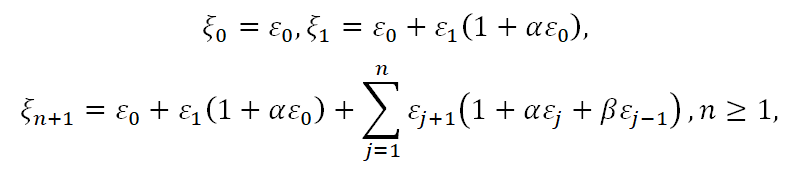

In [122]:
ksi = np.zeros((M, N+1))

for i in range(M):
  ksi[i][0] = eps[i][0]
  ksi[i][1] = eps[i][0] + eps[i][1] * (1 + alpha * eps[i][0])

for i in range(2, M):
  for j in range(N+1):
    # for k in range(0, j):
    #   sum = eps[i][k] * (1 + alpha * eps[i][k-1] + beta * eps[i][k-2])
    ksi[i][j] = ksi[i][j-1] + eps[i][j] * (1 + alpha * eps[i][j-1] + beta * eps[i][j-2])

ksi_mtx_visual = pd.DataFrame(ksi)
ksi_mtx_visual

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,1.287598,3.376946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.010058,3.645700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-4.628019,-5.507034,-5.247407,-5.745674,-7.090648,-7.392490,-6.492406,-7.037924,-6.757863,-6.439421,...,-391.442952,-394.854526,-390.243570,-390.087625,-390.696339,-387.586875,-391.960148,-392.300098,-391.196585,-394.358392
3,3.567106,6.496675,0.851500,0.938282,1.252528,0.147154,-0.303666,-2.067492,-4.374249,-4.408080,...,270.044440,266.745868,273.078549,276.765147,277.406097,277.349289,268.687014,264.186767,268.016665,271.231835
4,-2.020609,-5.166615,-4.167589,-4.450064,-4.301038,-4.979075,-4.869661,-4.430553,-6.152454,-5.226420,...,84.099097,82.693979,82.609456,82.828563,82.291355,85.709346,87.834926,85.080340,87.978028,88.041503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.324448,-0.399104,-1.156154,-0.965643,-2.100215,-3.300672,-2.378509,-2.303112,-0.051317,2.365921,...,36.122526,34.703428,32.454618,24.488876,21.938464,20.793334,21.608751,21.163197,25.060574,24.807326
1196,9.083331,9.798833,10.225015,10.128491,13.227900,8.299372,6.076916,3.726183,1.998576,6.055056,...,64.172025,61.140159,55.133029,55.037062,54.828950,53.666312,55.112797,58.413536,63.885119,67.677002
1197,2.283298,-3.643226,-8.389109,-13.713356,-20.055607,-15.663858,-13.556932,-16.526138,-20.556488,-23.624299,...,-127.190197,-119.206787,-120.637200,-122.179966,-130.629330,-127.183932,-123.595310,-130.056946,-129.249403,-129.773119
1198,-0.884933,-0.003749,4.142217,6.044392,5.413410,3.643712,0.852345,-0.849349,2.378894,-1.136746,...,-196.178939,-200.853402,-198.611456,-206.804905,-210.313636,-208.900164,-208.014139,-210.536685,-209.701110,-209.985619


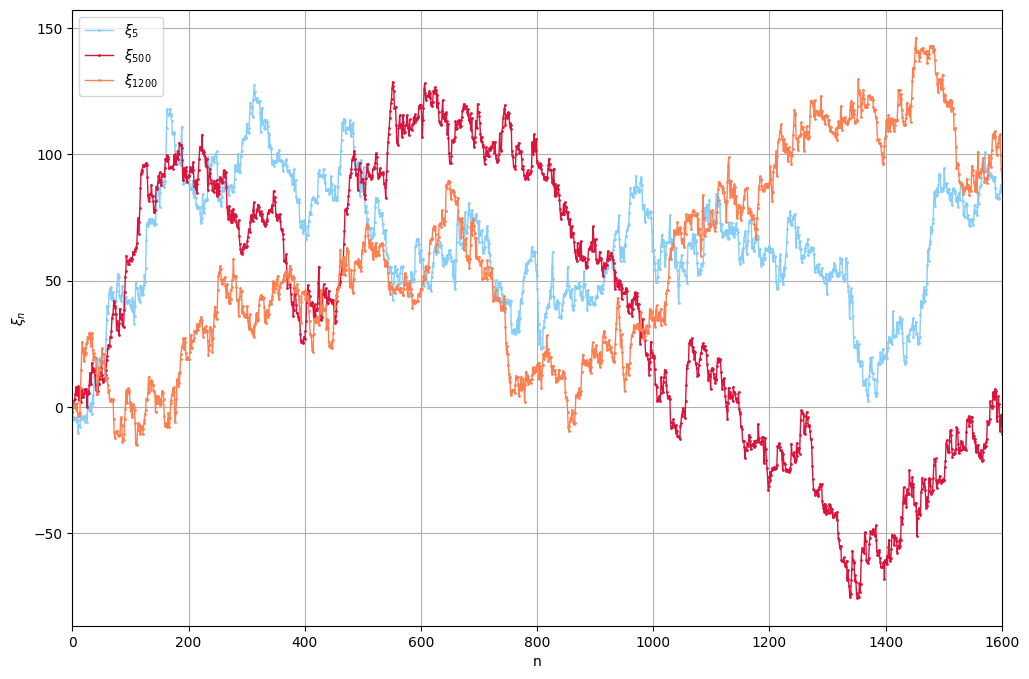

In [123]:
plt.figure(figsize=(12, 8))
n = np.linspace(0, N+1, N+1)
plt.xlim([0, N+1])
plt.plot(n, ksi[4], '-o', markersize = 1, linewidth=1, color='lightskyblue', label="$\u03BE_5$")
plt.plot(n, ksi[499], '-o', markersize = 1, linewidth=1, color='crimson', label="$\u03BE_{500}$")
plt.plot(n, ksi[1199], '-o', markersize = 1, linewidth=1, color='coral', label="$\u03BE_{1200}$")
plt.xlabel('n')
plt.ylabel('$\u03BE_n$')
plt.grid()
plt.legend()
plt.show()

![image.png](_2riLS0fik1m9qSe6uqNHz3SU8g3ti+0Tz4o7jkGoQwVfiBxgfgoDtT3Ez+hUdP7+5mahADDImvBzome3jf03bPuaKYCZYksPw3JfKo7u1OVk56fD72WnzIEVACAL0Y1KZnYTUS+Mb4Tn28Div7YbVBl+WlwS2P9tzRbkSxKjWMKbq1Pru4TA+pRdnqcN7y9oel0QRVlz5yqtLbmEa8Xe+sRQHUNOGPSvW1ww2H+zbR2p2xIbFTEmi6qeuWosQ3cDsr4PJ1UhZg9LRyfcePk0nZU1OoqfbduTyI10lOpXzltuhbpV3q/UHPWkyb2xOloNszOJ7vxdnEbxDSdivQtbEXL/VA5n3f9mqfBYlG1fjn5iM/cF65trXIm7Tn/eiuAiLReiOXl3xfLXl+YX6zfy6fq/aJqahffP5tnhp4HCvvaRwVT7t72ZwRTTqeHt1vaFduSive5naqsuGQl3oh+34uISgHdd/28VyxT7m8+z+u3LLIktY6solGDSklZpY8CXXBM4S77PNnp98SUFTCbssLmdJ68Iom5nES8Z83vWpdkdwrFdoRcmK2XyRWowki8l83LFbH0Z67taLQNyUlcMXl/i9dZrYNIW+vDXT6fN92N3xZTaP+AX830NHEFAd5ek3PdRfrm2+tZb1nZwKgwULH/rQpx1ke8H8vLVu9xWuj3Mm33Q9V8hQp7xno0ToMzy1GfGd83l9GoMlW+HDOtzfxb+rl0XdMNrLHs2vmlcrt98wit8kzLZVXO12UeOIPTVPxeo93tkp6/Wk7F9P4x5P4SaeDZn58QUHXGdH1m7GQ7w+iTZDEXOb6/Cwu/61sX8b7KE+YJuLhG7hNPm21Ig7MrI1YFbj5QA+c6aLx9gfiOXGaNfSPVT08Lf174IDsBldbdCHb6HRPPZ29P+n3HycWzD7Nl+9bJsRHt94N/Pt/6iQ8apoF/Oen75U3K869z3Tx8y3Gmnc4XVct2JLWar/BB9vuFtKpK3/Qzf/rWzzOs3bKq5/Mvr3ke8EqPT8e6NWYc622m2uv8w/T+yPe4fpBdRAX3v8uFxbqGFjMb5x7Xz7TlNlarwgMO8f0/IrKJX1N/C7ON/Yzda7Yp1IoL6HZcnHNEj3qFZK0x+ardNvgc1wt6k82R/e6fIrmF5jqk9m8HCu/v9V/1NEnP9rgdGf+/pWfrORc70t9XsV0XPo4Z/VI1z7soJ6mzH5rrKA2Oa3re8gu78oWi294JrvzRhf3LkmLnssd0q7PKttQ9TTeus1/cBp0HxHfXD7wfyuWIrYhjnWvPihjQaqo7lJr5SPurT3X0HFA5A6lGyVk15wJVQ0swGueqeSbkmmX0+C52MNfQ1G90bXyrw8uB/lnr02QbPMSJ8oVWtLnTf/uMf5MsEhAHpX3e4irjE7r7rf+spb/0nK30hUBx6KXjX3qlDqqzi4si6+DW5amyXIUd/tnL9am7H1roIg1kxQt+Uax8oY1+3+s86uh2rTYut1/Qg0w782JLNY7n356XTjJp/6lC3bRu4or7pWTgeUBc1ai0RlPEQes5oHKfi/qlTxbAUjXmuSY9Hl+uzTa4iCvOF6JVrSu9/E7Zuuvdv9EhWjWsmNBjeo70hUC8pBfjRM8BQlyWe66yY3o1rkJkJTF1e+aVVSQbP9PH3R/a6Tu2eprsB96UcSGoiGlesX6t0sBeTnaB4GPk0YO66qstX85YLEdsRxAVKn/o/CLeTwp3KdZUGAHkck32S/M8YxtmHjDJLvQE51OxAXPmlS861fFptXybHvj5HeJwNN+G3H4hj+D6B4euCp4flOIk8Hyo+bjIpY/0NC4Eslsn7uJvQk+lkxc/uuTOFowT1nRKL/9+0Sp9hl6ialmP50s63O/ECV+1JW3yALjpfgiipHyw7Xzrx5qkQc5cTtLgAsH31MTHWs4ukvlrPta1W03xhwit/am3X9rkmbKh5oFc+pSg+f6FfvUcUPMyl/hsh6npI8l0Hvsq1CaCS2Xzli4U16fJNhTsF/R2VyzDPSetCq4PytaPTXtOz/RCYPusmgyIu+qt7HezbMSdLZgnKe5s4XHmPdHtF2Oab2N5gnuv+J5Xq/3QQoM0cEnLis8WIYjQcklxMjeef0/S8voH3cQjzS9Vj5NFfll3ePw12C9N80zJF8kDqUsu4i1Hd3OfulPpggukngNqHhREVHBXoODuovj/LLONKDufZAd5AQeX2ys9CuGMz/8b69N8G0x/afF216qMcvT4pKpMiINy+vBKk6c2j9n6Ts80vWJailtrfnTVTWfVqssxDiLt7tLb74fmLkyDmRpFg+d3XsPJ3mKELsrXssfH6QVXnl+2c0/bO5FfPj666pGmz/3yVfKAccwWy2FhUHp/5JsFBRGmyrXe+NzApwa7BmpaqC8z48NCBAFjPq6IIoLLpTVG8xOITZVd2OvTZhtS8fKD7lofwWmNzpjieOKodVlP6/QUFwptboHyC4G5uKN01Ra9RLvRYS7bD81dlgZ5TV5nUNMXcGGrC6yCNDgL6ePFPL9saV7s+IE7exD5xblBLfJLn/vlK+WBbB/E50dfqaWnWr5N1O6U5xOm2kTi1GA2XOY2Z1VtkJJTlLbl8jVYNtpA5R0LiLdlW67A2aZNfZb+rj0FFW2isnZl3A7M+bW8LZ1adrY2+Qgkrt9vtA12I3j71zht0+UX11Gsm5jPSu90ucYCkihNG3P9q9VNT7Vuaj9yHrCTwtzXvvRVsm107dxK/vTJ3g8i/b7Kp2m7XX4/4XXM9k/7/ZDNV2oDWDWf7Xwa5O2eXcsxP8uWo/NDs1Fy8u2x8jZ3iuFZfmV+MZattrFpfmm7X3xq7stB5oEK5v6R61E3Pb4Czt+eeDEgfBzI82+7jh2Mg9gx2YGm+rul/MO9iBhBmqcgNE4ULuLkUcxQWc8tRUbAs6fiTksDqnh/V86w3t9ndbbBcyKS6eFZR07XrAF8OhkHMZ+oVHp60rx0wHvUSM98PcQyjYTLTyD25Lz4YHJbmx0wpTQoLYNP0Pl3srQ30pVP9vLbLfdD6/lcqtKgajkZceIWF0/mMoNzebTIs5x04mHAQuMC0VI6oZcv4BrnF/Ebrvdbpa9QmWeGngdqkid1Yz/YeeSL4nSpe976RBcG1J/ACKhD35tf2Rc5YK4KaQAd5oHsqeF3iKh80eLZDnkD0erkzOf2fs/rn9ZsBn6WJm3uviukAXSZB2artEOPr89fSUtVPrx11OlIy1ztGsfma+6lqqo1Q/cQUKEHTbpY+66QBtBtHuDgLLsidFR+/Fo4aLoracluUj2110ePf0jcvZLd0cbYCrDca921uuR0QUCFKzvSnvs+njxdv63fYCENoMs8oDs0kUO4FYY0+4q4ZrmzW03VTaq/d6gRjVdPFAYBBWFI0S6hJCnUQJbtf92tMa5CP/r9ucwhq1CI2olyxRB3Af53hjSAa+UBLlPMKtt9A5xOzkpcsjKYP81UGfL5MlK5H3qqu/CDA2paGak44cR3qawmnJi45u1PvExBGgDyQD0cGMtBUbdg8FW4krWlK2pTm/R3+6i7dcP/iB0OAADQsz0tbt7o7rSxe5XjrhHHS5rsTp6erHi+OW150IazAzMcaT0d05LqfPcyKEMFAIDP4enT2D8Gb2pGmyShaLKkcVohaerrT1p3+3i2L+zLIaACAMCn4G5ay81l9Og6FYMHyCH6HsRd50FXRuLiy4q7TzVmcLkJzX6R1g4uNL+xBg/w9GHtgIAKAACfQDUjKnf3rAcD8Aw+wu1PechGekpEEN3Q42x09jFu2sSo2GRpthF3ueLmlVnNa7iv4x33vBxQlBQeR1dAQAUAgOvhARSmU1oUo2PFEJRqMADXkIE8jmws4lxEKxFI61HNb9yjMfEA+iJoRhw8HctrOIITAioAAFwF301OX/6JVzFtnwtlnDxK0sQz7N/oN3GxZz4g+wU4cIt46hyNSY6uNKFfj2qIRHMd5UhjvvXzkXV9AQAArkW2KbWbrvCACZVNWTztUFX7U3IO5uFS1Q5VfqZXQrUbTpvwqGY7TZva4A4VAACuS/ZYZN4BcsWjM2PCeno5mm3eKRHROIi3tJyP6YbHh7W/YqjubSn5EJ/pQlyr4pK8qw0aD/+MgAoAAFdWaLoiy09d3Q2a1Dzx61/7UbEwmm3kAOnJLlKB9cHTZGb/Qss4pCdn/4yq4/10IH2uiPQU6spJ/Di6YfkpQ0AFAICrGz0+USjuAJcve1nrts6oO3Keivajo5kKgj5cDhpEK3ctXVl+at8lc2f6XDnp+fnQvPxUQEAFAIAezGilnvvSQ+1Rd3gINqIPT0Q97hc03wYU/XG1Qd3Tv0O5qUxKNqUpdsqvH03Hcf4ouAl0PQgAAD3RXQaKO8NdsbvBpkQwnb7d0tPqkWq3oEmJeW/mW/U63NHJ6N9QtnNtOZIPAioAAPRGBqyPJyuIfRcIqAAAAB1AGSoAAEAHEFABAAA6gIAKAADQAQRUAACADiCgAgAAdAABFQAAoAMIqAAAAB1AQAUAAOgAAioAAEAHEFABAAA6gIAKAADQAQRUAACADiCgAgAAdAABFQAAoAMIqAAAABcj+h/ogt44QetS6QAAAABJRU5ErkJggg==)

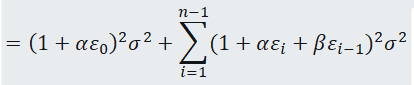

In [124]:
ksi_sq = np.zeros((M, N))

for i in range(M):
  ksi_sq[i][0] = (1 + alpha * eps[i][0])**2 * (sigma**2)

for i in range(M):
  for j in range(1, N):
    ksi_sq[i][j] = ksi_sq[i][j-1] + (sigma**2) * (1 + alpha * eps[i][j] + beta * eps[i][j-1])**2

zeta = np.zeros((M, N))

for i in range(M):
  for j in range(N):
    zeta[i][j] = ksi[i][j] / ((ksi_sq[i][j])**(1/2))

zeta_visual = pd.DataFrame(zeta)
zeta_visual

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.449770,0.690852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.497523,0.621770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-1.149782,-1.314177,-1.243414,-0.973581,-1.169934,-1.185784,-1.028777,-1.113958,-0.895291,-0.852775,...,-3.017067,-3.043567,-3.067755,-3.031292,-3.029807,-3.034161,-3.008685,-3.042425,-3.044971,-3.035984
3,2.871066,1.030081,0.123455,0.135853,0.176631,0.020692,-0.042196,-0.261230,-0.552603,-0.554682,...,2.134013,2.125557,2.098320,2.147049,2.174617,2.179653,2.176762,2.107567,2.071588,2.100981
4,-0.471814,-1.036233,-0.829562,-0.885438,-0.641504,-0.737063,-0.718814,-0.638552,-0.854275,-0.665611,...,0.645849,0.656685,0.645707,0.644990,0.646695,0.642164,0.668748,0.684900,0.663323,0.685687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.452981,-0.232132,-0.670597,-0.267711,-0.567854,-0.490586,-0.352980,-0.331356,-0.006748,0.273202,...,0.293334,0.284308,0.273113,0.255248,0.192424,0.172374,0.163324,0.169728,0.166147,0.196596
1196,2.517843,2.261326,2.351050,2.136641,2.113545,1.283158,0.882555,0.533521,0.265135,0.621283,...,0.487141,0.490353,0.466928,0.420809,0.420076,0.418326,0.409432,0.420406,0.445111,0.486709
1197,0.627696,-0.627726,-1.252967,-1.622865,-2.170926,-1.598541,-1.296905,-1.517287,-1.746437,-1.970689,...,-0.944461,-0.996511,-0.933306,-0.944472,-0.955663,-1.021051,-0.993986,-0.964673,-1.014841,-1.008535
1198,-0.504330,-0.000947,0.843562,0.986346,0.868905,0.434151,0.099882,-0.090085,0.246405,-0.110344,...,-1.532411,-1.488686,-1.524050,-1.505484,-1.566780,-1.593039,-1.582279,-1.574930,-1.593737,-1.587405


In [125]:
s_N = [0 for i in range(M)]

for i in range(M):
  s_N[i] = zeta[i][N-1]

l = math.floor(1 + 3.32 * math.log10(M))
l

11

In [126]:
max = np.max(s_N)
min = np.min(s_N)
omega = max - min
h = omega / l
count, interv = np.histogram(s_N, l) #количество попаданий и интервалы группировки
p = count / M #относительные частоты
col = p / h #высоты столбцов

mid = np.zeros(len(interv) - 1)
for i in range(len(interv) - 1):
  mid[i] = (interv[i+1] + interv[i]) / 2
(count, interv, col, mid)

(array([  6,  19,  71, 166, 261, 286, 235, 113,  31,  10,   2]),
 array([-3.32024345, -2.69049214, -2.06074084, -1.43098953, -0.80123823,
        -0.17148692,  0.45826438,  1.08801569,  1.71776699,  2.3475183 ,
         2.97726961,  3.60702091]),
 array([0.00793964, 0.0251422 , 0.09395243, 0.21966343, 0.34537443,
        0.37845628, 0.31096932, 0.14952993, 0.04102148, 0.01323274,
        0.00264655]),
 array([-3.0053678 , -2.37561649, -1.74586519, -1.11611388, -0.48636257,
         0.14338873,  0.77314004,  1.40289134,  2.03264265,  2.66239395,
         3.29214526]))

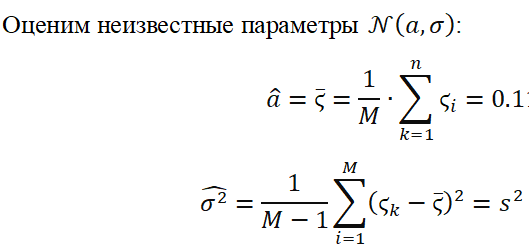

In [127]:
sum1 = 0
sum2 = 0
for i in range(M):
  sum1 += s_N[i]
a_m = (1 / M) * sum1

for i in range(M):
  sum2 += (s_N[i] - a_m)**2
s_2 = (1 / (M - 1)) * sum2

(a_m, s_2)

(-0.019545459409205643, 0.9939053326262386)

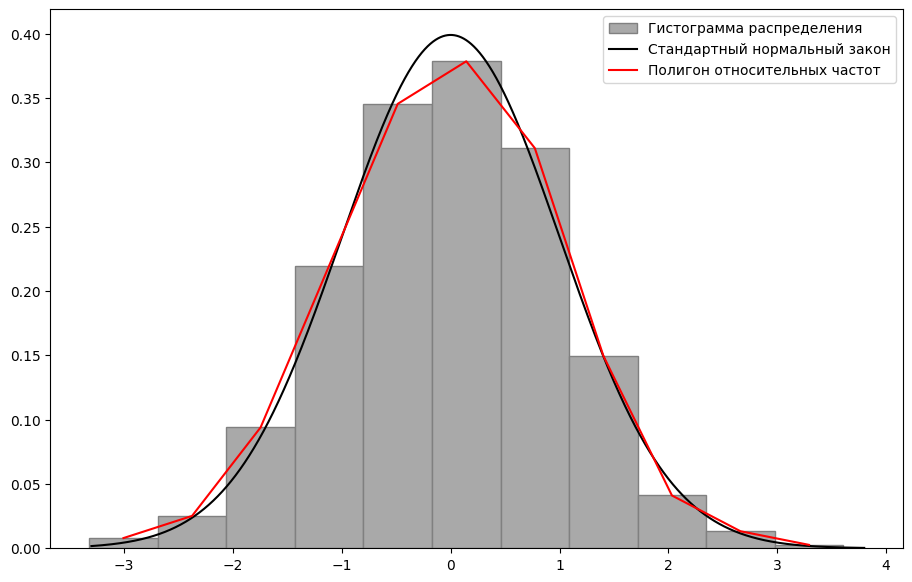

In [133]:
plt.figure(figsize=(11, 7))
plt.hist(s_N, bins=l, density=True, edgecolor='grey', color='darkgrey',  label="Гистограмма распределения")
x = np.arange(-3.3, 3.8, 0.001)
plt.plot(x, scipy.stats.norm.pdf(x, 0, 1), color='black',  label="Стандартный нормальный закон")
plt.plot(mid, col, color='red',  label="Полигон относительных частот")
plt.legend()

In [129]:
p_1 = scipy.stats.norm.cdf(interv[1], a_m, s_2**(1/2)) - 0 #F(-inf) = 0
p_2 = scipy.stats.norm.cdf(interv[2], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[1], a_m, s_2**(1/2))
p_3 = scipy.stats.norm.cdf(interv[3], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[2], a_m, s_2**(1/2))
p_4 = scipy.stats.norm.cdf(interv[4], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[3], a_m, s_2**(1/2))
p_5 = scipy.stats.norm.cdf(interv[5], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[4], a_m, s_2**(1/2))
p_6 = scipy.stats.norm.cdf(interv[6], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[5], a_m, s_2**(1/2))
# p_7 = 1 - scipy.stats.norm.cdf(interv[7]) #F(+inf) = 1
p_7 = scipy.stats.norm.cdf(interv[7], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[6], a_m, s_2**(1/2))
p_8 = scipy.stats.norm.cdf(interv[8], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[7], a_m, s_2**(1/2))
p_9 = scipy.stats.norm.cdf(interv[9], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[8], a_m, s_2**(1/2))
p_10 = scipy.stats.norm.cdf(interv[10], a_m, s_2**(1/2)) - scipy.stats.norm.cdf(interv[9], a_m, s_2**(1/2))
p_11 = 1 - scipy.stats.norm.cdf(interv[10], a_m, s_2**(1/2))
p_i = [p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11]
(p_i,
 M * p_1, M * p_2, M * p_3, M * p_4, M * p_5, M * p_6, M * p_7, M * p_8, M * p_9, M * p_10, M * p_11,
 count)

([0.0036907598657908523,
  0.01661648726578932,
  0.05811491660052248,
  0.1380727225371497,
  0.22293823734598778,
  0.24469451284985733,
  0.18257780719636052,
  0.09259550610253653,
  0.0319081622469104,
  0.007467296501925014,
  0.001323591487170095],
 4.4289118389490225,
 19.939784718947184,
 69.73789992062697,
 165.68726704457964,
 267.52588481518535,
 293.6334154198288,
 219.09336863563263,
 111.11460732304383,
 38.289794696292475,
 8.960755802310016,
 1.5883097846041139,
 array([  6,  19,  71, 166, 261, 286, 235, 113,  31,  10,   2]))

In [130]:
chi_B = 0
for i in range(l):
  chi_B += (count[i] - M * p_i[i])**2 / (M * p_i[i])

chi = scipy.stats.chi2.ppf(0.95, l-1-2) #Квантиль хи-квадрат
(chi_B, chi)

(3.784624915384172, 15.50731305586545)